# Day 5 Action Item, Sarcasm detection
### In this notebook I'll apply what I learnt about deep learning in the previous days to detect weather a tweet is sarcastic or not.

## The dataset:
### you can find it [here](https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection) along with all the info

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json
/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json


### Reading dataset

In [2]:
df=pd.read_json('/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json',lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [3]:
df.tail()

,is_sarcastic,headline,article_link
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...
28618,1,dad clarifies this not a food stop,https://www.theonion.com/dad-clarifies-this-no...


### the dataset has 3 columns
* is_sarcastic: 1 if the record is sarcastic otherwise 0
* headline: the headline of the news article
* article_link: link to the original news article. Useful in collecting supplementary data

In [4]:
df.shape

(28619, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


### data has no null values

In [6]:
df['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

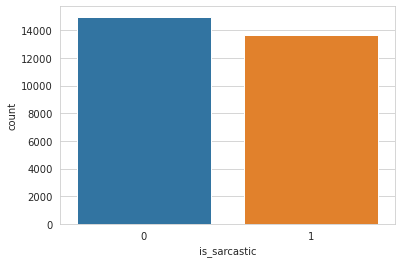

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='is_sarcastic',data=df);

### data classes are not equal

## Split the data into training/testing sets, 80% for training and 20% for validation or testing

In [8]:
X=df['headline'].values
y=df['is_sarcastic'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Tokens and padding
### in NLP problems Tokenization is splitting a phrase, sentence, paragraph, or an entire text document into smaller units,individual words or terms.each one of these units is called a token.
### Padding helps in solving the problem of unequal token lenghts, it adds 0 to fixed lenght zeros to the end of the sequence. 

In [9]:
vocab_size = 10000
oov_tok = '<00V>'
max_length = 120
padding_type = 'post'
trunc_type = 'post'
embedding_dim = 16
num_epochs = 10

In [10]:
tokenizer= Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index=tokenizer.word_index
training_sequences=tokenizer.texts_to_sequences(X_train)
training_padded=pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_sequences=tokenizer.texts_to_sequences(X_test)
testing_padded=pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## Building a sequential model

### GlobalAveragePooling1D

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(training_padded, 
                    y_train, 
                    validation_data=(testing_padded, y_test), 
                    epochs=30, 
                    verbose=2)

Epoch 1/30
716/716 - 3s - loss: 0.6441 - accuracy: 0.6313 - val_loss: 0.5090 - val_accuracy: 0.7863
Epoch 2/30
716/716 - 2s - loss: 0.3939 - accuracy: 0.8431 - val_loss: 0.3765 - val_accuracy: 0.8340
Epoch 3/30
716/716 - 2s - loss: 0.2999 - accuracy: 0.8790 - val_loss: 0.3554 - val_accuracy: 0.8440
Epoch 4/30
716/716 - 2s - loss: 0.2541 - accuracy: 0.8990 - val_loss: 0.3630 - val_accuracy: 0.8396
Epoch 5/30
716/716 - 2s - loss: 0.2229 - accuracy: 0.9123 - val_loss: 0.3398 - val_accuracy: 0.8517
Epoch 6/30
716/716 - 2s - loss: 0.1962 - accuracy: 0.9262 - val_loss: 0.3599 - val_accuracy: 0.8471
Epoch 7/30
716/716 - 2s - loss: 0.1786 - accuracy: 0.9322 - val_loss: 0.3565 - val_accuracy: 0.8522
Epoch 8/30
716/716 - 2s - loss: 0.1612 - accuracy: 0.9412 - val_loss: 0.3719 - val_accuracy: 0.8480
Epoch 9/30
716/716 - 2s - loss: 0.1471 - accuracy: 0.9457 - val_loss: 0.3938 - val_accuracy: 0.8447
Epoch 10/30
716/716 - 2s - loss: 0.1342 - accuracy: 0.9517 - val_loss: 0.4132 - val_accuracy: 0.8450

## Visualize model accuracy and loss

In [14]:
def plot_acc(model,epochsnum):
    df_m=pd.DataFrame(model.history.history)
    df_m['Epoch']=range(1,epochsnum+1)
    df_m.index=df_m['Epoch']
    score = model.evaluate(testing_padded, y_test, batch_size=64, verbose=1)
    print('Test accuracy:', score[1])
    plt.plot(df_m['loss'])
    plt.plot(df_m['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.show()

90/90 [==============================] - 0s 1ms/step - loss: 1.0557 - accuracy: 0.8134
Test accuracy: 0.8134171962738037


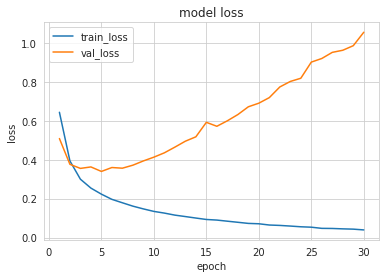

In [16]:
plot_acc(model=model,epochsnum=30)

### it's clear we have overfitting :(

## Flatten model

In [22]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model2.summary()
# train model
history= model2.fit(training_padded, 
                    y_train, 
                    validation_data=(testing_padded, y_test), 
                    epochs=10, 
                    verbose=2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                46104     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 206,129
Trainable params: 206,129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
716/716 - 3s - loss: 0.4419 - accuracy: 0.7773 - val_loss: 0.3049 - val_accuracy: 0.8693
Epoch 2/30
716/716 - 2s - loss: 0.2040 - accuracy: 0.9201 - val_loss: 0.3174 - val_accuracy: 0.8618
Epoch 3/30
716/716 - 2s - loss: 0.1135 - accur

90/90 [==============================] - 0s 1ms/step - loss: 1.4373 - accuracy: 0.8277
Test accuracy: 0.8277428150177002


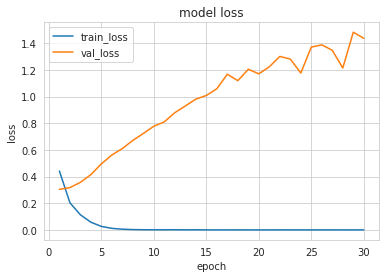

In [23]:
plot_acc(model=model2,epochsnum=30)

## LSTM 

In [27]:
model_lstm = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_8 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model_lstm.fit(training_padded, 
                    y_train, 
                    validation_data=(testing_padded, y_test), 
                    epochs=10, 
                    verbose=2)

Epoch 1/10
716/716 - 43s - loss: 0.0044 - accuracy: 0.9983 - val_loss: 1.4181 - val_accuracy: 0.8263
Epoch 2/10
716/716 - 43s - loss: 0.0044 - accuracy: 0.9985 - val_loss: 1.2427 - val_accuracy: 0.8234
Epoch 3/10
716/716 - 42s - loss: 0.0027 - accuracy: 0.9991 - val_loss: 1.4818 - val_accuracy: 0.8286
Epoch 4/10
716/716 - 42s - loss: 0.0021 - accuracy: 0.9993 - val_loss: 1.5145 - val_accuracy: 0.8206
Epoch 5/10
716/716 - 41s - loss: 0.0025 - accuracy: 0.9992 - val_loss: 1.5405 - val_accuracy: 0.8190
Epoch 6/10
716/716 - 42s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 1.5523 - val_accuracy: 0.8199
Epoch 7/10
716/716 - 41s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 1.5633 - val_accuracy: 0.8253
Epoch 8/10
716/716 - 42s - loss: 0.0011 - accuracy: 0.9996 - val_loss: 1.6730 - val_accuracy: 0.8199
Epoch 9/10
716/716 - 42s - loss: 0.0033 - accuracy: 0.9987 - val_loss: 1.5110 - val_accuracy: 0.8173
Epoch 10/10
716/716 - 42s - loss: 0.0031 - accuracy: 0.9990 - val_loss: 1.3854 - val_accura

90/90 [==============================] - 2s 19ms/step - loss: 1.3854 - accuracy: 0.8190
Test accuracy: 0.8190076947212219


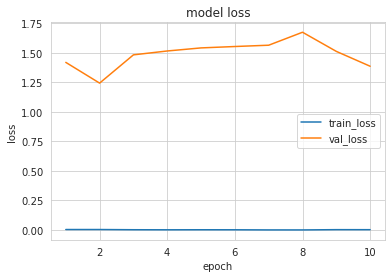

In [30]:
plot_acc(model=model_lstm,epochsnum=10)

## In this notebook I tried to plainly appply what I learnt without adding any optimization, data cleaning or feature engineering, I'll add these later and observe changes in performance.